In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [7]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
284315 + 492

284807

In [9]:
284315/284807

0.9982725143693799

In [10]:
data['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

<Axes: xlabel='Class'>

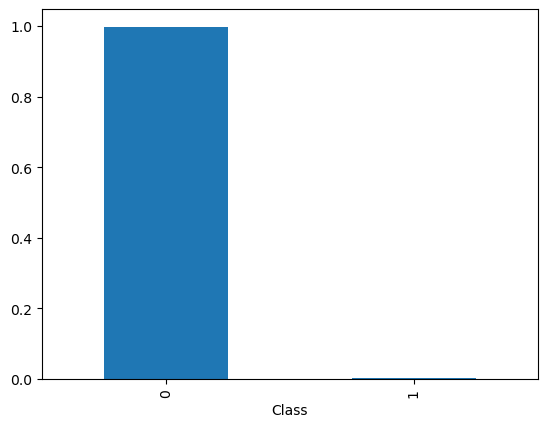

In [11]:
data['Class'].value_counts(normalize=True).plot(kind='bar')

In [12]:
# Undersampling

# 0 - 492
# 1 - 492

#Oversampling

# 0 - 284315
# 1 - 284315

Imbalanced dataset - Accuracy is not the right metric

In [14]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
X = data.drop(columns = ['Class', 'Time'])
y = data['Class']

In [16]:
train_x, test_x, train_y, test_y =train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [18]:
train_y.value_counts(normalize = True), test_y.value_counts(normalize = True)

(Class
 0    0.998271
 1    0.001729
 Name: proportion, dtype: float64,
 Class
 0    0.99828
 1    0.00172
 Name: proportion, dtype: float64)

In [19]:
decision_unbalanced_model =  DecisionTreeClassifier()


In [20]:
decision_unbalanced_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [21]:
train_pred = decision_unbalanced_model.predict(train_x)
test_pred = decision_unbalanced_model.predict(test_x)

In [22]:
print('Train accuracy: ', accuracy_score(train_y, train_pred))
print('Test accuracy: ', accuracy_score(test_y, test_pred))

Train accuracy:  1.0
Test accuracy:  0.9991924440855307


In [23]:
print('Train classification report: ', classification_report(train_y, train_pred))
print('Test classification report: ', classification_report(test_y, test_pred))

Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.79      0.77        98

    accuracy                           1.00     56962
   macro avg       0.88      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
def model_pred_results(train_x, test_x, train_y, test_y, model):
    model.fit(train_x, train_y)
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    print('Train accuracy: ', accuracy_score(train_y, train_pred))
    print('Test accuracy: ', accuracy_score(test_y, test_pred))
    print('Train classification report: ', classification_report(train_y, train_pred))
    print('Test classification report: ', classification_report(test_y, test_pred))
    print('Train confusion matrix:', confusion_matrix(train_y, train_pred))
    print('Test confusion matrix:', confusion_matrix(test_y, test_pred))

    return accuracy_score(train_y, train_pred), accuracy_score(test_y, test_pred)

In [25]:
RF_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_x, test_x, train_y, test_y, RF_unbalanced_model)

Train accuracy:  1.0
Test accuracy:  0.9995962220427653
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845

Test classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Train confusion matrix: [[227451      0]
 [     0    394]]
Test confusion matrix: [[56862     2]
 [   21    77]]


In [26]:
#Standard Scaler

scale = StandardScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

In [27]:
X_scaled[:4]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534


In [28]:
data_scaled = pd.concat([X_scaled, y], axis = 1)

In [29]:
train_scaled_x, test_scaled_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [30]:
train_scaled_x.shape, test_scaled_x.shape, train_y.shape, test_y.shape

((227845, 29), (56962, 29), (227845,), (56962,))

In [31]:
# UnderSampling

under_sampling = RandomUnderSampler()

In [32]:
train_y.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [33]:
train_scaled_underSample_X, train_y_under_sample = under_sampling.fit_resample(train_scaled_x, train_y)

In [34]:
train_data_scaled_underSample = pd.concat([train_scaled_underSample_X, train_y_under_sample], axis = 1)

In [35]:
train_data_scaled_underSample['Class'].value_counts()

Class
0    394
1    394
Name: count, dtype: int64

<Axes: >

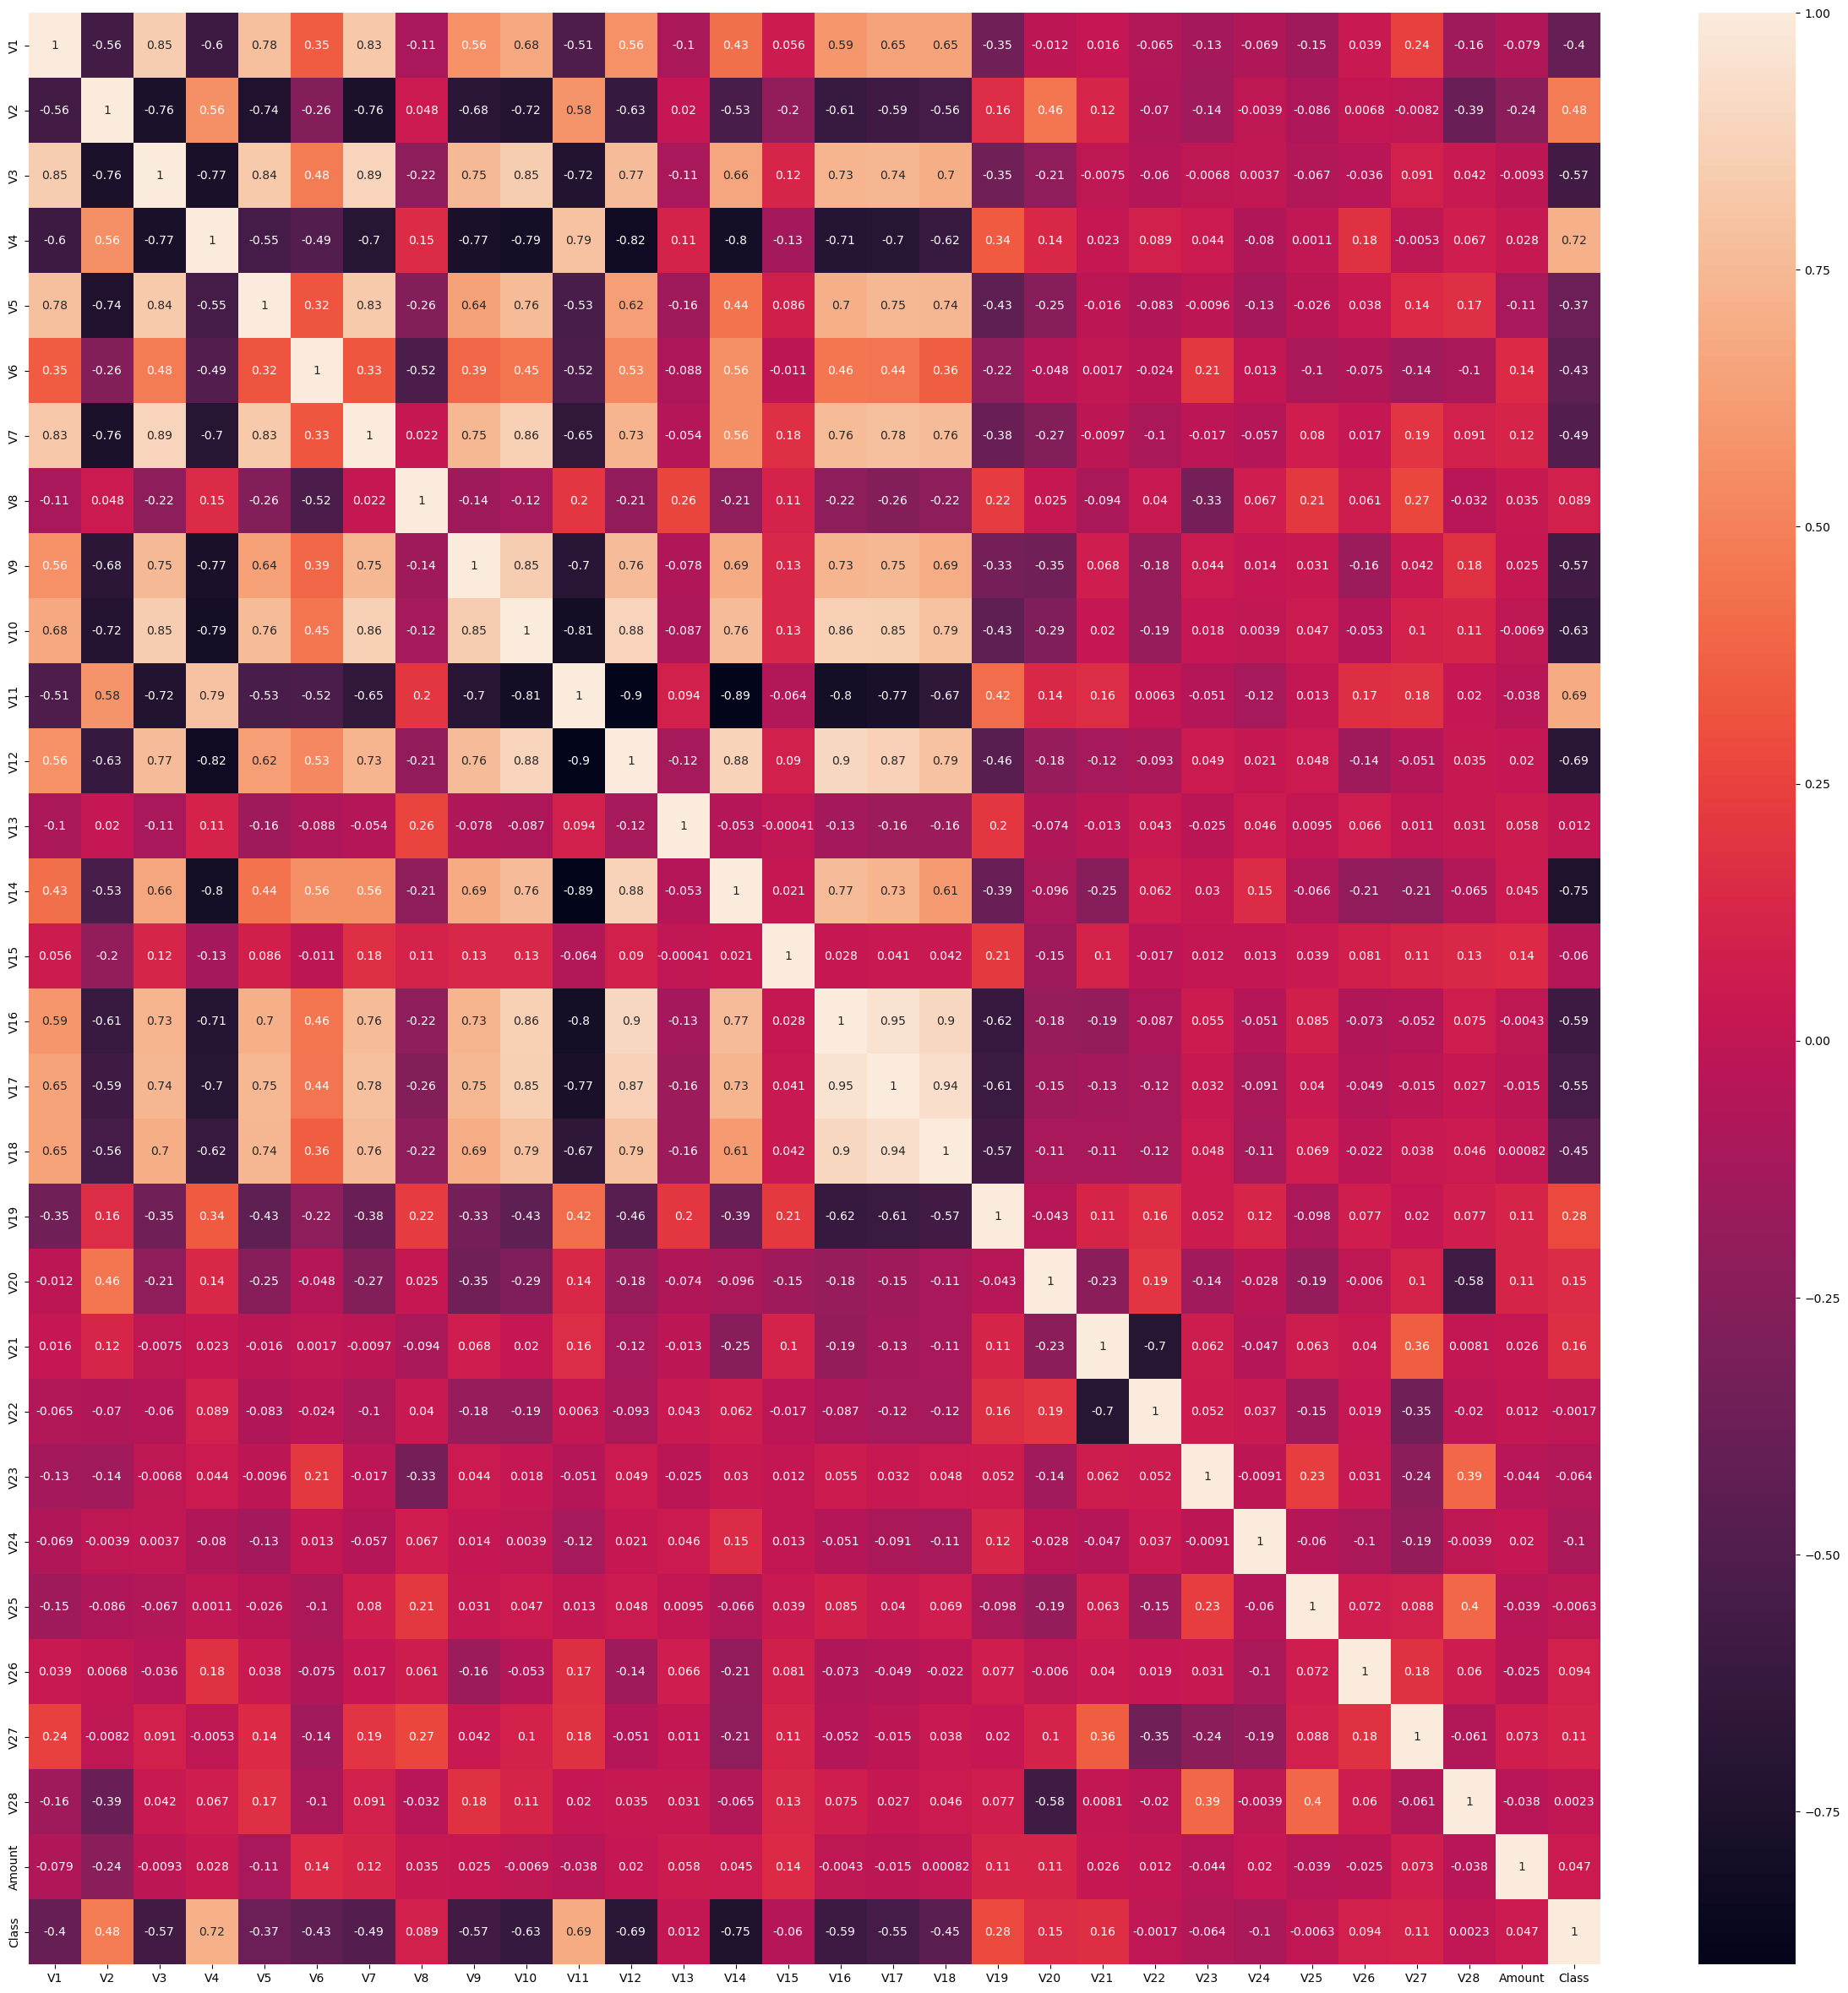

In [36]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_data_scaled_underSample.corr(), annot = True)

In [37]:
DT_balanced_model = DecisionTreeClassifier()
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, DT_balanced_model)

Train accuracy:  1.0
Test accuracy:  0.9083950703978091
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[51651  5213]
 [    5    93]]


In [38]:
# param_grid = {
#     'n_estimators' : [50, 100, 150, 200, 250],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [3, 5, 7, 9],
#     'min_samples_leaf': [3, 5, 7, 9],
#     'max_features': [0.3, 0.4, 0.5]
# }

param_grid = {
    'n_estimators' : [100, 150],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 7],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [3, 5],
    'max_features': [0.3, 0.4]
}

In [39]:
RF_unbalanced_model = RandomForestClassifier()
train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, RF_unbalanced_model)

Train accuracy:  1.0
Test accuracy:  0.974474210877427
Train classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       394

    accuracy                           1.00       788
   macro avg       1.00      1.00      1.00       788
weighted avg       1.00      1.00      1.00       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Train confusion matrix: [[394   0]
 [  0 394]]
Test confusion matrix: [[55418  1446]
 [    8    90]]


In [40]:
grid = GridSearchCV(estimator = RF_unbalanced_model, param_grid = param_grid, cv = 5, verbose = 2, scoring = 'f1')

In [41]:
%%time
grid.fit(train_scaled_underSample_X, train_y_under_sample)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=   0.3s
[CV] END max_depth=5, max_features=0.3, min_samples_leaf=3, min_samples_split=3, n_estimators=150; total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7], 'max_features': [0.3, 0.4],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 150]},
             scoring='f1', verbose=2)

In [42]:
grid.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.4, min_samples_leaf=5,
                       min_samples_split=5)

In [43]:
grid.best_score_

0.9311531398847339

In [44]:
grid.best_estimator_.oob_score

False

In [45]:
grid.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

In [46]:
model = RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5, min_samples_split=5)
model.fit(train_scaled_underSample_X, train_y_under_sample)

RandomForestClassifier(max_depth=7, max_features=0.3, min_samples_leaf=5,
                       min_samples_split=5)

In [47]:
model.feature_importances_

array([0.00341218, 0.01017144, 0.01033452, 0.12483942, 0.00400551,
       0.00467568, 0.01878543, 0.00889413, 0.00732774, 0.18639115,
       0.05392424, 0.13519596, 0.0021651 , 0.25340927, 0.00318068,
       0.02466688, 0.09631425, 0.00446561, 0.01361787, 0.00525904,
       0.00577228, 0.00446149, 0.00275765, 0.00219854, 0.00200963,
       0.00297539, 0.00210741, 0.00162502, 0.00505647])

In [48]:
model.feature_names_in_

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype=object)

<Axes: >

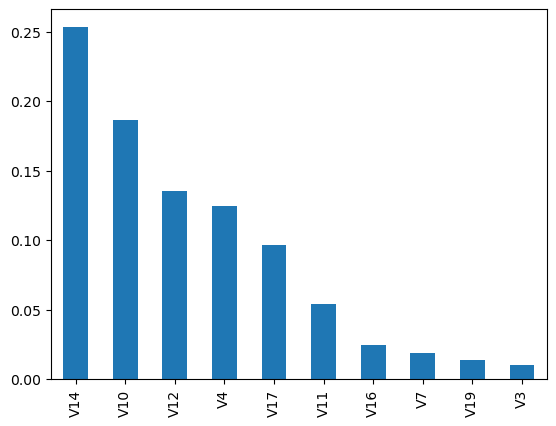

In [49]:
pd.Series(model.feature_importances_, index = model.feature_names_in_).sort_values(ascending = False)[:10].plot(kind = 'bar')

In [50]:

train_accuracy, test_accuracy = model_pred_results(train_scaled_underSample_X, test_scaled_x, train_y_under_sample, test_y, model)

Train accuracy:  0.9682741116751269
Test accuracy:  0.9722446543309575
Train classification report:                precision    recall  f1-score   support

           0       0.95      0.99      0.97       394
           1       0.99      0.94      0.97       394

    accuracy                           0.97       788
   macro avg       0.97      0.97      0.97       788
weighted avg       0.97      0.97      0.97       788

Test classification report:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.93      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Train confusion matrix: [[391   3]
 [ 22 372]]
Test confusion matrix: [[55290  1574]
 [    7    91]]
